In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
tags = pd.read_csv("ml-latest-small/tags.csv")
links = pd.read_csv("ml-latest-small/links.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")
ratings = pd.read_csv("ml-latest-small/ratings.csv")

In [4]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
topId = ratings['movieId'].value_counts()[:100].index.tolist()
topmovies = []
for top in topId:
    topmovies.append(movies['title'][movies['movieId'] == top].item())

In [8]:
topscores = []
for top in topId:
    topscores.append(np.mean(ratings[ratings['movieId'] == top]['rating']))

In [9]:
allscores = []
for idd in movies['movieId']:
    allscores.append(np.mean(ratings[ratings['movieId'] == idd]['rating']))

In [1]:
#print(topmovies)

In [10]:
metascore_ratings = [82, 81, 94, 85, 73, 90, 68, 68, 75, 94, 66, 95, 82, 84, 77, 65, 59, 77, 85, 92, 58, 100, 87, 69, 87, 91,
                     94, 86, 85, 64, 63, 74, 88, 78, 87, 67, 84, 71, 72, 59, 37, 80, 56, 63, 84, 95, 89, 72, 53, 58, 72, 74, 77,
                     70, 90, 42, 75, 65, 51, 51, 91, 51, 84, 64, 41, 64, 65, 79, 79, 89, 69, 84, 62, 90, 83, 84, 90, 90, 90, 84,
                     68, 72, 73, 91, 58, 59, 77, 71, 69, 80, 67, 74, 52, 70, 63, 52, 56, 75, 66, 68]

In [11]:
reg = LinearRegression().fit(np.array(topscores).reshape(-1,1), metascore_ratings)
interc = reg.intercept_
slope = reg.coef_[0]
x = np.linspace(2.5,4.5,100)
y = slope * x + interc
print(reg.score(np.array(topscores).reshape(-1,1), metascore_ratings))

0.4501021179822432


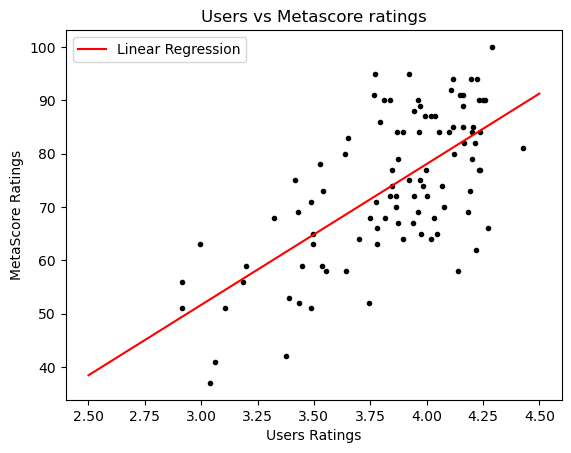

In [24]:
plt.scatter(topscores, metascore_ratings, marker = '.', c = 'k')
plt.plot(x, y, c = 'r', label = 'Linear Regression')
plt.xlabel("Users Ratings")
plt.ylabel("MetaScore Ratings")
plt.title('Users vs Metascore ratings')
plt.legend()
plt.show()

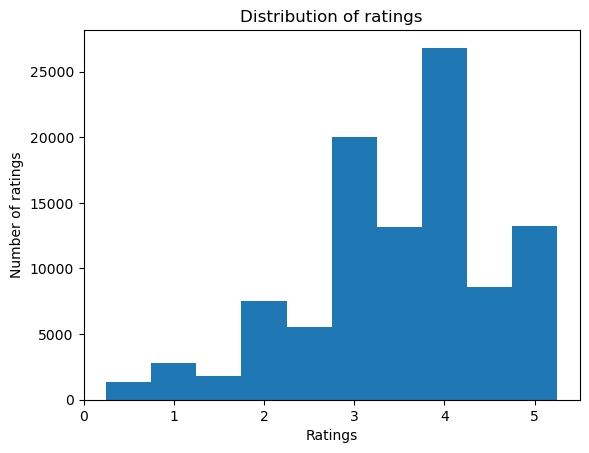

In [23]:
plt.hist(ratings['rating'], bins = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25])
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.title('Distribution of ratings')
plt.show()

In [14]:
tagsval = []
for idd in movies['movieId']:
    tagsval.append([])
    b = list(tags['tag'][tags['movieId'] == idd])
    for i in range(len(b)):
        a = b[i].split(' ')
        for el in a:
            tagsval[-1].append(el)

In [15]:
sentiments = pd.read_csv("sentiments.txt", delim_whitespace=True, skiprows = 3)
sentiments.set_index('word', inplace = True)
sentiments

,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
word,,,,,,,
laughter,1,8.50,0.9313,3600,--,--,1728
happiness,2,8.44,0.9723,1853,2458,--,1230
love,3,8.42,1.1082,25,317,328,23
happy,4,8.30,0.9949,65,1372,1313,375
laughed,5,8.26,1.1572,3334,3542,--,2332
...,...,...,...,...,...,...,...
murder,10218,1.48,1.0150,2762,3110,1541,1059
terrorism,10219,1.48,0.9089,--,--,3192,--
rape,10220,1.44,0.7866,3133,--,4115,2977


In [16]:
words_evaluated = np.asarray(list(sentiments.index))
happy_avg = np.asarray(list(sentiments['happiness_average']))

In [17]:
def sentiment_list(words):
    l = 0
    happiness = 0
    for word in words:
        if word in words_evaluated:
            idx = np.where(words_evaluated == word)
            happiness += happy_avg[idx]
            l += 1
    if l == 0:
        return 0
    return float(happiness / l)

In [18]:
sentiment_tags = []
for tags in tagsval:
    sentiment_tags.append(sentiment_list(tags))

In [19]:
print(sentiment_tags[:10])

[7.96, 6.5680000000000005, 3.98, 0, 6.02, 0, 0, 0, 0, 0]


In [20]:
sentiments_true = []
score_true = []
for i in range(len(sentiment_tags)):
    if sentiment_tags[i] != 0:
        sentiments_true.append(sentiment_tags[i])
        score_true.append(allscores[i])

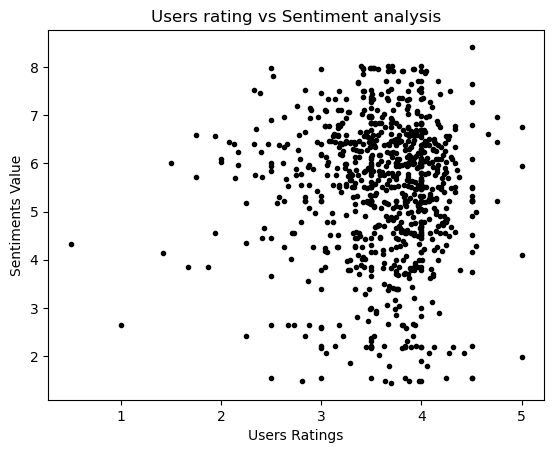

In [25]:
plt.scatter(score_true, sentiments_true, marker = '.', c = 'k')
plt.xlabel("Users Ratings")
plt.ylabel("Sentiments Value")
plt.title('Users rating vs Sentiment analysis')
plt.show()